<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/Jisha_Obukwelu_DSPT5_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-21 21:51:47--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.179.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.179.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.5MB/s    in 13s     

2020-01-21 21:52:06 (14.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

The columns that I need are: 
* product_id, 
* product_name, 
* add_to_cart_order. 

This information can be found in order_products__prior.csv, order_products__train.csv, and products.csv






##Make Necessary Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### order_products__prior

In [14]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### order_products__train

In [15]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### products

In [16]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


##Join and Reshape Data

###Concatenate

In [9]:
orders = pd.concat([order_products__prior, order_products__train])
print(orders.shape)
orders.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


###Merge

In [10]:
final = pd.merge(orders,products[['product_id', 'product_name']], on='product_id', how='inner')
final.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1,1,Organic Egg Whites
1,26,33120,5,0,Organic Egg Whites
2,120,33120,13,0,Organic Egg Whites
3,327,33120,5,1,Organic Egg Whites
4,390,33120,28,1,Organic Egg Whites


In [17]:
final = final.drop(['reordered'], axis=1)
print(final.shape)
final.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,product_name
0,2,33120,1,Organic Egg Whites
1,26,33120,5,Organic Egg Whites
2,120,33120,13,Organic Egg Whites
3,327,33120,5,Organic Egg Whites
4,390,33120,28,Organic Egg Whites


### 2 Step

In [18]:
top_10 = (orders[['order_id', 'product_id', 'add_to_cart_order']]
         .merge(products[['product_id', 'product_name']]))
print(top_10.shape)
top_10.head()               

(33819106, 4)


,order_id,product_id,add_to_cart_order,product_name
0,2,33120,1,Organic Egg Whites
1,26,33120,5,Organic Egg Whites
2,120,33120,13,Organic Egg Whites
3,327,33120,5,Organic Egg Whites
4,390,33120,28,Organic Egg Whites


## Top 10 Products

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon
8. Strawberries
9. Limes
10. Organic Whole Milk

In [19]:
final['product_name'].value_counts()[:10]

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

###Table 2 --> Tidy

In [21]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [22]:
# table2 -> tidy
table2 = table2.reset_index()
table2.head()

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [24]:
# tidy -> table2
tidy2 = table2.melt(id_vars='index')
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [25]:
tidy2 = tidy2.rename(columns = {
    'index':'trt',
    'variable':'name',
    'value':'result'
})

tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [28]:
tidy = tidy2[['name','trt', 'result' ]]
tidy.trt = tidy.trt.str.replace('treatment','')
tidy

,name,trt,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


### Tidy --> Table 2

In [29]:
wide = tidy2.pivot_table(index='trt', columns = 'name', values = 'result')
wide

name,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


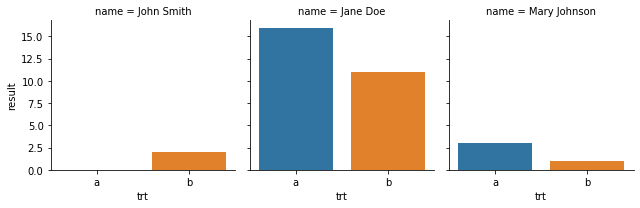

In [33]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=3);

###Flights

In [0]:
flights = sns.load_dataset('flights')

In [31]:
# Flights Pivot Table
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [32]:
flight_pivot = flights.pivot_table(index='year', columns='month', values='passengers')
flight_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.




What columns are needed?
* order id
* product id
* product name
* hour of day ordered

Where is the information located? 
* products.csv
* order_products__prior.csv
* order_products__train.csv
* orders.csv

###Load and Concatentate Necessary CSV files

In [0]:
department = pd.read_csv('departments.csv')

aisle = pd.read_csv('aisles.csv')

products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                             pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

###Merge Datasets

In [0]:
merged = ((products[['product_id', 'product_name', 'department_id', 'aisle_id']])
          .merge(department[['department_id', 'department']])
          .merge(aisle[['aisle_id', 'aisle']])
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))



In [80]:
print(merged.shape)
merged.head()

(33819106, 8)


,product_id,product_name,department_id,aisle_id,department,aisle,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,19,61,snacks,cookies cakes,1107,11
1,46149,Zero Calorie Cola,7,77,beverages,soft drinks,1107,11
2,9434,Bag of Large Lemons,1,34,frozen,frozen meat seafood,1107,11
3,769,Sliced American Cheese,16,21,dairy eggs,packaged cheese,1107,11
4,12078,Shredded Mexican Blend Cheese,16,21,dairy eggs,packaged cheese,1107,11


###Most Popular Products

In [65]:
merged['product_name'].value_counts()[:25]

Banana                        491291
Bag of Organic Bananas        394930
Organic Strawberries          275577
Organic Baby Spinach          251705
Organic Hass Avocado          220877
Organic Avocado               184224
Large Lemon                   160792
Strawberries                  149445
Limes                         146660
Organic Whole Milk            142813
Organic Raspberries           142603
Organic Yellow Onion          117716
Organic Garlic                113936
Organic Zucchini              109412
Organic Blueberries           105026
Cucumber Kirby                 99728
Organic Fuji Apple             92889
Organic Lemon                  91251
Organic Grape Tomatoes         88078
Apple Honeycrisp Organic       87272
Seedless Red Grapes            86748
Organic Cucumber               85005
Honeycrisp Apple               83320
Organic Baby Carrots           80493
Sparkling Water Grapefruit     79245
Name: product_name, dtype: int64

###Morning Popular Products

In [29]:
condition1 =  (merged['order_hour_of_day']>=6)&(merged['order_hour_of_day']<=10)
top_morning = merged[condition1]
top_morning['product_name'].value_counts()[:25]

Banana                        130034
Bag of Organic Bananas        103310
Organic Strawberries           70885
Organic Baby Spinach           61910
Organic Hass Avocado           54537
Organic Avocado                44238
Strawberries                   39794
Large Lemon                    39366
Organic Whole Milk             38608
Organic Raspberries            38489
Limes                          34807
Organic Yellow Onion           28497
Organic Blueberries            27120
Organic Garlic                 26481
Organic Zucchini               26300
Organic Fuji Apple             26264
Organic Half & Half            24934
Apple Honeycrisp Organic       23507
Cucumber Kirby                 23396
Seedless Red Grapes            23139
Honeycrisp Apple               22486
Organic Lemon                  22187
Half & Half                    21469
Sparkling Water Grapefruit     21429
Organic Grape Tomatoes         21229
Name: product_name, dtype: int64

In [30]:
top_morning['order_hour_of_day'].value_counts()

10    2874905
9     2550569
8     1787359
7      928239
6      302642
Name: order_hour_of_day, dtype: int64

### Evening Popular Products

In [33]:
condition2 =  (merged['order_hour_of_day']>=15)&(merged['order_hour_of_day']<=19)
top_evening = merged[condition2]
top_evening['product_name'].value_counts()[:25]

Banana                        155408
Bag of Organic Bananas        122678
Organic Strawberries           85798
Organic Baby Spinach           79051
Organic Hass Avocado           70788
Organic Avocado                59548
Large Lemon                    50322
Limes                          46295
Strawberries                   45479
Organic Raspberries            43434
Organic Whole Milk             42633
Organic Yellow Onion           35978
Organic Garlic                 35680
Organic Zucchini               33922
Cucumber Kirby                 32181
Organic Blueberries            32178
Organic Lemon                  29037
Organic Fuji Apple             28189
Organic Grape Tomatoes         28037
Organic Cucumber               27104
Apple Honeycrisp Organic       26308
Seedless Red Grapes            26175
Honeycrisp Apple               25322
Sparkling Water Grapefruit     24512
Organic Baby Arugula           24482
Name: product_name, dtype: int64

In [34]:
top_evening['order_hour_of_day'].value_counts()

15    2780731
16    2647695
17    2186409
18    1714445
19    1317576
Name: order_hour_of_day, dtype: int64

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

Comment: Trying to recreate the Instacart "Hour of Day Ordered" chart. I am not sure what column they pulled the data from. When I count the most popular product names within a certain time frame, the items on the graph are not the ones that show up. 

In [107]:
m_product_names = ['Half And Half Ultra Pasteurized', "Sweet & Salty Nut Granola Bars, Peanut", 
                   'Pub Mix', 'Nutri Grain Bars Multi Pack', 'Trail Mix', 
                   'Original Rice Krispies Treats', 'Apples', 
                   'Cheez-It Baked Snack Crackers', 'Dry Roasted Almonds', 
                   'Zero Calorie Cola',"Crunchy Oats 'n Honey Granola Bars",
                   'Original Beef Jerky', 'Cheez-It Cheddar Cracker',
                   'Popcorn', 'Milk Chocolate Almonds', '0% Greek Strained Yogurt',
                   'Extra Fancy Unsalted Mixed Nuts', 'Pink Lady Apples', 
                   'with Crispy Almonds Cereal', 'Original Almondmilk', 
                   'Clementines', 'Half and Half Cream', 'French Vanilla Coffee Creamer',
                   'Orange & Lemon Flavor Sparkling Fruit Beverage',
                   'Cinnamon Brown Sugar Breakfast Biscuits']


condition1 = merged['product_name'].isin(m_product_names)

morning = merged[condition1]

print(morning.shape)
morning.head()

(166677, 8)


,product_id,product_name,department_id,aisle_id,department,aisle,order_id,order_hour_of_day
1,46149,Zero Calorie Cola,7,77,beverages,soft drinks,1107,11
13,6184,Clementines,4,32,produce,packaged produce,1107,11
38,45051,Pub Mix,19,107,snacks,chips pretzels,9273,15
40,12427,Original Beef Jerky,19,23,snacks,popcorn jerky,9273,15
42,39657,Milk Chocolate Almonds,19,45,snacks,candy chocolate,9273,15


In [115]:
morning = morning[['product_name', 'order_hour_of_day']]
print(morning.shape)
morning.head()

(166677, 2)


,product_name,order_hour_of_day
1,Zero Calorie Cola,11
13,Clementines,11
38,Pub Mix,15
40,Original Beef Jerky,15
42,Milk Chocolate Almonds,15


In [108]:
e_product_names = ['Half Baked Frozen Yogurt', 'The Tonight Dough Ice Cream', 
                   'Americone Dream Ice Cream', 'Half Baked Ice Cream',
                   'Phish Food Ice Cream', 'Milk and Cookies Ice Cream',
                   'Sicilian Pistachio', 'Chocolate Peanut Butter Cup Gelato',
                   'Birthday Cake Light Ice Cream','Cherry Garcia Ice Cream',
                   'Strawberry Ice Cream','Vanilla Bean Light Ice Cream',
                   'Coffee Ice Cream', 'Roman Raspberry Sorbetto',
                   'Mediterranean Mint Gelato','Caramel Cookie Crunch Gelato',
                   'Chocolate Chip Cookie Dough Ice Cream', 'Mint Chip', 
                   'Coconut Almond Mini Frozen Dessert Bars', 'Mint Chocolate Chip Ice Cream',
                   'Chocolate Peanut Butter Ice Cream', 'Vanilla Milk Chocolate Almond Ice Cream Bars',
                   'Sea Salt Caramel Gelato', 'Vanilla Bean Ice Cream',
                   'Rising Crust Pepperoni Pizza']

condition2 = merged['product_name'].isin(e_product_names)   

evening = merged[condition2]

print(evening.shape)
evening.head()

(99253, 8)


,product_id,product_name,department_id,aisle_id,department,aisle,order_id,order_hour_of_day
1023,40002,Strawberry Ice Cream,1,37,frozen,ice cream ice,224060,12
4363,40002,Strawberry Ice Cream,1,37,frozen,ice cream ice,839897,16
10391,40002,Strawberry Ice Cream,1,37,frozen,ice cream ice,1957727,13
13768,40002,Strawberry Ice Cream,1,37,frozen,ice cream ice,2524869,17
14060,27179,Rising Crust Pepperoni Pizza,1,79,frozen,frozen pizza,2597068,13


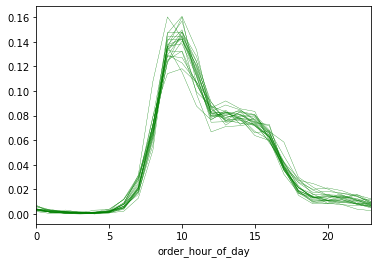

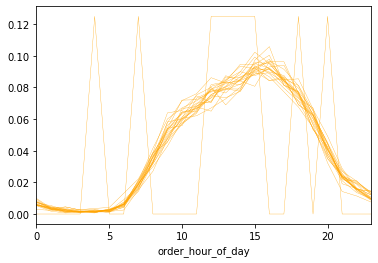

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

(pd.crosstab(morning['order_hour_of_day'],
            morning['product_name'],
            normalize = 'columns')
            .plot(color='green', linewidth = 0.3, legend=None))

(pd.crosstab(evening['order_hour_of_day'],
            evening['product_name'],
            normalize = 'columns')
            .plot(color='orange', linewidth = 0.3, legend=None))


plt.xlabel = 'Hour of Day Ordered'
plt.ylabel = 'Percent of Orders by Product'

plt.show()